<a href="https://colab.research.google.com/github/lcbjrrr/quantai/blob/main/E3_Py_Stat_Prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability.

## Examples

What is the percentage of people under 1.8 mt high

In [ ]:
from scipy.stats import norm
x=1.8
u=1.7
o=0.1
Z= (x-u)/o
print(Z) #normalizacao
um_oitenta = norm.cdf(Z)
print(um_oitenta)

1.0000000000000009
0.8413447460685431


Percentage of people with height between 1.6 and 1.8

In [ ]:
x=1.6
Z= (x-u)/o
print(Z) #normalizacao
print(norm.cdf(Z))
um_oitenta - norm.cdf(Z)

-0.9999999999999987
0.1586552539314574


0.6826894921370857

Percentage of people higher than 1.9

In [ ]:
x=1.9
Z= (x-u)/o
print(Z) #normalizacao
print(norm.cdf(Z))
1-norm.cdf(Z)

1.9999999999999996
0.9772498680518208


0.02275013194817921

## Sampleling

### Central Limit Theory

In [ ]:
premiums = [333,	320,	301,	280,	270,	251,	260,	255,	355,	345,	355,	345,	366,	352,	331,	308,	297,	276,	286,	281,	391,	380,	391,	380,	300,	288,	271,	252,	243,	226,	234,	230,	320,	311,	320,	311]


In [ ]:
import numpy as np
np.mean(premiums)

305.97222222222223

In [ ]:
import numpy.random as rd
sample = rd.choice(premiums, 10)
print(sample)
np.mean(sample)

[251 366 271 252 281 331 345 234 391 230]


295.2

In [ ]:
u_samples=[]
n=30 # sample size
for i in range(200):
    sample = rd.choice(premiums, n)
    u_samples.append(np.mean(sample))
print(u_samples)
np.mean(u_samples)

[297.8666666666667, 308.6666666666667, 293.8666666666667, 319.4, 317.8666666666667, 304.1666666666667, 313.53333333333336, 302.1666666666667, 315.93333333333334, 319.3, 293.6333333333333, 309.93333333333334, 305.6, 310.06666666666666, 308.1333333333333, 305.6, 291.26666666666665, 300.73333333333335, 306.06666666666666, 308.8333333333333, 310.8, 318.7, 291.5, 319.03333333333336, 328.8666666666667, 309.1666666666667, 318.43333333333334, 320.1666666666667, 320.06666666666666, 308.93333333333334, 302.3, 311.4, 314.8333333333333, 306.03333333333336, 315.2, 296.6333333333333, 307.93333333333334, 299.7, 304.1333333333333, 314.1333333333333, 296.23333333333335, 303.53333333333336, 308.03333333333336, 307.3, 293.56666666666666, 305.8, 312.26666666666665, 299.3333333333333, 304.23333333333335, 289.23333333333335, 296.56666666666666, 302.93333333333334, 310.43333333333334, 296.0, 318.4, 300.9, 314.1, 307.56666666666666, 309.0, 299.76666666666665, 309.8666666666667, 302.76666666666665, 306.7, 296.

306.6168333333333

<ipython-input-24-b2c6572cf39a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(u_samples)


<Axes: ylabel='Density'>

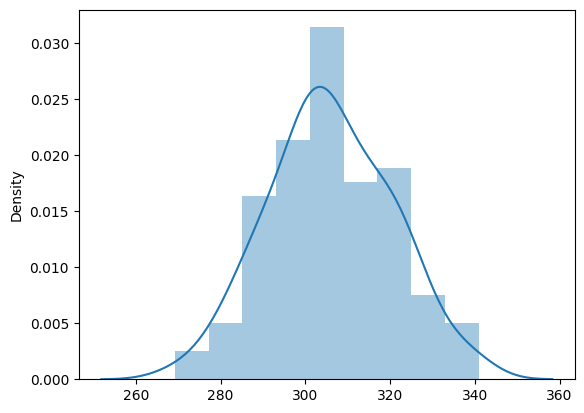

In [ ]:
import seaborn as sns
sns.distplot(u_samples)

In [ ]:
from math import sqrt
print(np.std(u_samples))
np.std(premiums) / sqrt(n)

8.1064151533763


8.527350996679807

### Example

In the IBGE database for salaries less than R$5,000. Taking samples of 500 interviewees, what is the average salary, inferential error and confidence interval for a significance level of 5%?

In [ ]:
ages =[23,	24,	31,	33,	40,	44,	55,	56,	18,	19,	28,	29,	37,	40,	48,	53,	66,	67,	22,	23,	32,	34,	43,	46,	56,	62,	77,	78,	25,	27,	37,	38,	50,	53,	64,	70,	88,	90,	29,	30]
u = np.mean(ages)
s = np.std(ages)
print(u)
print(s)

44.625
19.132024853632196


In [ ]:
Z = norm.ppf(.975)
n = 30
e = Z * (s / sqrt(n))
e

6.846181365113965

In [ ]:
inf_lim = u - (Z * s / sqrt(n))
sup_lim = u + (Z * s / sqrt(n))
print(inf_lim,sup_lim)

37.778818634886036 51.471181365113964


<Axes: >

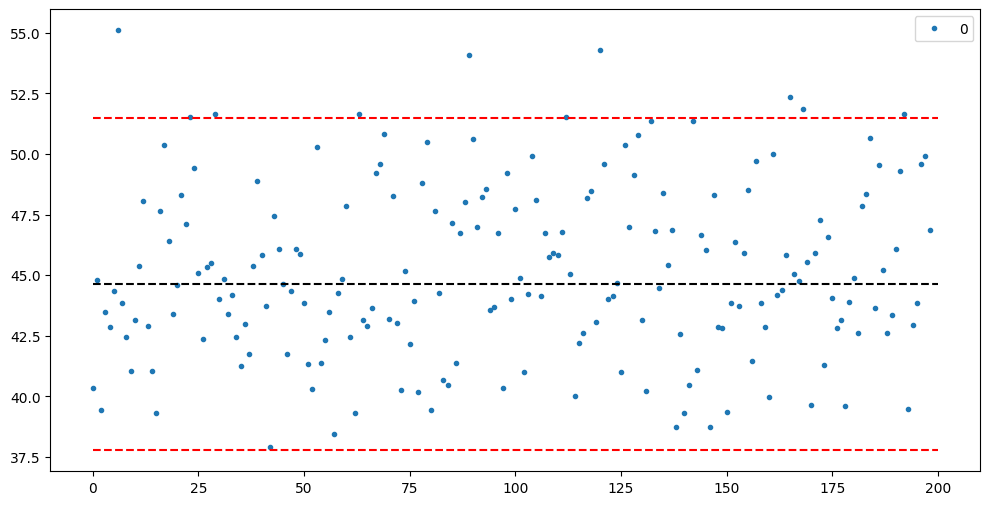

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
rounds=200
avgs = [np.mean(rd.choice(ages,n)) for i in range(1, rounds)]
avgsdf = pd.DataFrame(avgs)

ax = avgsdf.plot(style = '.')
ax.figure.set_size_inches(12, 6)
ax.hlines(y = u, xmin = 0, xmax = rounds, colors='black', linestyles='dashed')
ax.hlines(y = inf_lim, xmin = 0, xmax = rounds, colors='red', linestyles='dashed')
ax.hlines(y = sup_lim, xmin = 0, xmax = rounds, colors='red', linestyles='dashed')
ax

## Confidence Level and Significance


Suppose that the weights of bags of rice in a food industry are distributed approximately as a normal population standard deviation equal to 150 g. Selecting a random sample of 20 bags from a specific batch, an average weight of 5,050 g was obtained. Construct a confidence interval for the population mean assuming a significance level of 5%.

In [ ]:
sig = 0.05
conf = 1-sig
Z =z = norm.ppf(conf+sig/2)
Z

1.959963984540054

In [ ]:
devpad = 150
n =20
u = 5050
e = Z * (devpad / sqrt(n))
print(e)
print(u-e)
print(u+e)

65.73919054324361
4984.260809456757
5115.739190543243


In [ ]:
print('media',u)
norm.interval(confidence = conf, loc = u, scale = devpad / sqrt(n))

media 5050


(4984.260809456757, 5115.739190543243)

# Activities

1) Uma seguradora de automóveis deseja avaliar a espessura média dos para-brisas produzidos por um determinado fornecedor. Para isso, foram analisadas 25 peças aleatoriamente da produção diária, obtendo-se uma espessura média de 5,2 mm. Sabendo que a espessura dos para-brisas segue uma distribuição normal com um desvio padrão populacional de 1,2 mm, construa intervalos de confiança para a espessura média dos para-brisas aos níveis de 90%, 95% e 99%.


In [ ]:


from scipy.stats import norm
from math import sqrt

x=5.2
o=1.2
n=25

z05 = norm.ppf((1-0.05)+0.05/2)
z01 = norm.ppf((1-0.01)+0.01/2)
z10 = norm.ppf((1-0.10)+0.10/2)

e05 = z05 * (o / sqrt(n))
e01 = z01 * (o / sqrt(n))
e10 = z10 * (o / sqrt(n))
print('5%',x,x-e05,x+e05)
print('1%',x,x-e01,x+e01)
print('10%',x,x-e10,x+e10)

print(norm.interval(alpha = 0.95, loc = x, scale = o / sqrt(n)))
print(norm.interval(alpha = 0.99, loc = x, scale = o / sqrt(n)))
print(norm.interval(alpha = 0.90, loc = x, scale = o / sqrt(n)))









In [ ]:

from scipy.stats import t
from math import sqrt

x=5.2
o=1.2
n=25

t05 = t.ppf((1-0.05)+0.05/2, n-1)
t01 = t.ppf((1-0.01)+0.01/2, n-1)
t10 = t.ppf((1-0.10)+0.10/2, n-1)

e10 = t10 * o
e05 = t05 * o
e01 = t01 * o
print('5%',x,x-e05,x+e05)
print('1%',x,x-e01,x+e01)
print('10%',x,x-e10,x+e10)

from scipy.stats import t
print(t.interval(0.95,n-1,x,o))
print(t.interval(0.99,n-1,x,o))
print(t.interval(0.90,n-1,x,o))


2)	Uma seguradora de automóveis realizou um estudo sobre o tempo médio de atendimento aos clientes em uma determinada agência. Após analisar uma amostra de 6 atendimentos, obteve os seguintes tempos (em minutos): 25,2; 26,0; 26,4; 27,1; 28,2; 28,4. Sabe-se que o tempo de atendimento segue uma distribuição normal com variância igual a 1,96 minutos². Construa intervalos de confiança para o tempo médio de atendimento com nível de significância de 5% e 10%.


In [ ]:

from scipy.stats import t
from numpy import mean
o = sqrt(1.96)
ams = [25.2,26,26.4,27.1,28.2,28.4]
n = len(ams)
x = mean(ams)
print(t.interval(0.90,n-1,x,o))
print(t.interval(0.95,n-1,x,o))

3) Uma seguradora de automóveis deseja estimar a idade média dos seus clientes que possuem seguro para veículos de luxo. Foi realizada uma pesquisa com 100 clientes aleatoriamente escolhidos, obtendo-se uma idade média de 45 anos. Sabendo que o desvio padrão da idade dos clientes com seguro para veículos de luxo é de 5 anos, construir um intervalo de confiança de 95% para a idade média de todos os clientes com esse tipo de seguro.

In [ ]:

from math import sqrt
o=15
x=175
n=100
print('media',x)
norm.interval(alpha = 1-0.05, loc = x, scale = o / sqrt(n))


4) Uma seguradora de automóveis realizou uma pesquisa com 10 clientes para avaliar o valor médio gasto anualmente com reparos. A pesquisa revelou um gasto médio anual de R$ 1100,00 com um desvio padrão amostral de R$ 100,00. Construa intervalos de confiança de 90% e 95% para o gasto médio anual de todos os clientes da seguradora.

In [ ]:

from scipy.stats import t
n=10
x=110
s=10
print(t.interval(0.95,n-1,x,s))
print(t.interval(0.90,n-1,x,s))

5) Uma seguradora de automóveis realizou um estudo com 16 analistas de seguros para estudar o número médio de sinistros por ano. Os dados coletados foram: 7, 7, 8, 9, 9, 9, 10, 11, 11, 11, 12, 13, 13, 14, 15, 15. Construa intervalos de confiança para o número médio de sinistros por ano, considerando níveis de confiança de 97,5% e 75%.

In [ ]:

from scipy.stats import t
from numpy import mean,std
ams = [7,7,8,9,9,10,11,11,11,11,12,13,13,14,15,15]
n = len(ams)
x = mean(ams)
s=std(ams)
print('media',x)
print(t.interval(0.975,n-1,x,s))
print(t.interval(0.75,n-1,x,s))


6) Uma seguradora de transportes realiza um seguro para cargas de determinado tipo de equipamento industrial. Para garantir a segurança durante o transporte, as peças devem atender a um peso médio específico de 300 kg. Foi coletada uma amostra de 30 peças, obtendo-se os seguintes pesos (em kg):

[250,  265,  267,  269,  271,  275,  277,  281,  283,  284,
287,  289,  291,  293,  293,  298,  301,  303,  306,  307,
307,  309,  311,  315,  319,  322,  324,  328,  335,  339]

Utilizando um intervalo de confiança com nível de significância de 5%, verificar se a amostra coletada indica que o peso médio das peças atende à especificação da seguradora.


In [ ]:


from scipy.stats import norm
from numpy import mean,std
u=300
ams=[250,265,267,269,271,275,277,281,283,284,287,289,291,293,293,298,301,303,306,307,307,309,311,315,319,322,324,328,335,339]
x=mean(ams)
n=len(ams)
s=std(ams)
norm.interval(alpha = 0.95, loc = x, scale = s / sqrt(n))
#sim, satifaz, pois 300 ta no intervalo

7) Uma seguradora de equipamentos industriais realiza um seguro para um tipo específico de máquina. Para garantir a vida útil e o bom funcionamento dessas máquinas, as peças devem atender a especificações precisas de diâmetro. Foi coletada uma amostra de 30 peças, obtendo-se os seguintes diâmetros (em mm):

10, 11, 11, 11, 12, 12, 12, 12, 13, 13,
13, 13, 13, 13, 13, 13, 13, 13,   13, 13,
14,   14, 14, 14, 14, 15, 15, 15, 16, 16

a) Estimar a média e a variância:

b) Construir um intervalo de confiança para a média sendo α = 5%:


In [ ]:


from scipy.stats import norm
from numpy import mean,std,var

ams=[10,11,11,11,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,15,15,15,16,16]
x=mean(ams)
n=len(ams)
s=std(ams)
print('media',x,'var',var(ams))
norm.interval(alpha = 0.95, loc = x, scale = s / sqrt(n))




8) Uma seguradora está desenvolvendo um novo comercial de 30 segundos para um produto de seguro de vida. Para garantir a qualidade do comercial, foram realizadas 4 gravações de teste. Nessas gravações, o locutor levou, em média, 29,2 segundos para entregar o script, com uma variância de 5,76 segundos².

Considerando que o tempo ideal para o comercial é de 30 segundos, a seguradora deseja construir um intervalo de confiança de 90% para o tempo médio de duração do comercial. O objetivo é verificar se o tempo médio real das gravações está de acordo com o tempo ideal.



In [ ]:
from scipy.stats import t
from math import sqrt
n=4
x=29.2
s2=5.76
a=0.1
s=sqrt(s2)
t.interval(1-a,n-1,x,s)